#####  1. Experiment to check data metrics after removing top n values: <br>a. from a set of random values <br>b. from a set of NSE returns between two dates 

#####  2. Develop a dataset of mean returns for a given date range where each row represents returns after removing the top n returns. 

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#### Comparison of averages between overall numbers and after removing top 'n' values 

In [77]:
def plot(ret_type, size, limit):
    top_limit = list(np.arange(1, limit+1))
    if ret_type == 1:
        returns = np.random.rand(size)
    elif ret_type == 2:
        returns = np.random.randint(1, 1000, size=size)
    else:
        print('No type defined')
        
    df = pd.DataFrame({'rets': returns})
    val_df = pd.DataFrame(columns=['top_limit', 'reduced_mean'])
    val_df['top_limit'] = top_limit
    val_df['reduced_mean'] = [ df.sort_values(['rets'], ascending=False).reset_index(drop=True).loc[val:len(df)-1, 'rets'].mean() for val in top_limit ]
    val_df['reduced_std'] = [ df.sort_values(['rets'], ascending=False).reset_index(drop=True).loc[val:len(df)-1, 'rets'].std() for val in top_limit ]
    
    fig, axes = plt.subplots(1, 3, figsize=(20,8))
    val_df.plot(y='reduced_mean', x='top_limit', grid=True, ax=axes[0], title='Reduced mean')
    val_df.plot(y='reduced_std', x='top_limit', grid=True, ax=axes[1], title='Reduced std')
    val_df['reduced_mean'].pct_change().plot(grid=True, ax=axes[2], title='Reduced Mean Pct. Change')
    plt.show()

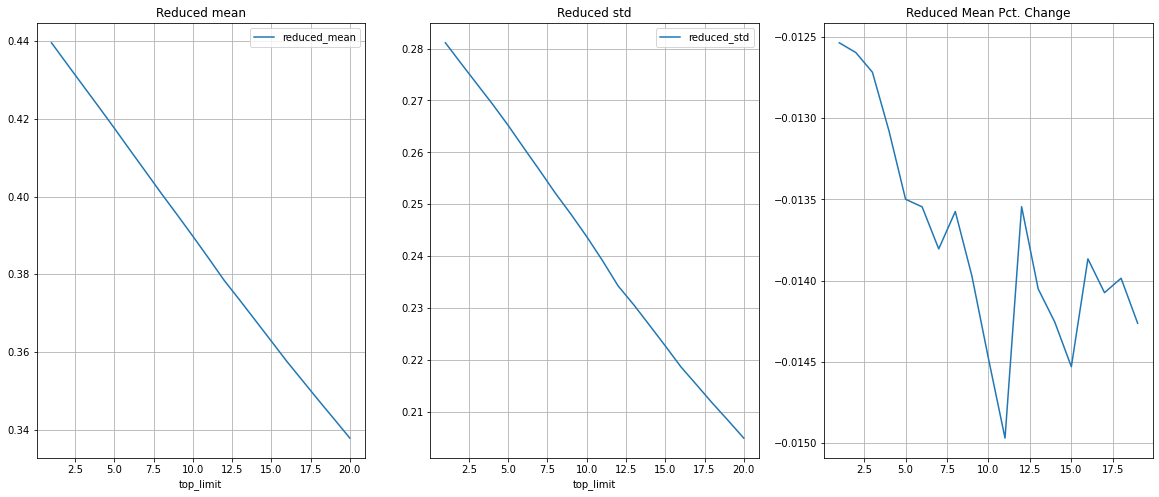

In [78]:
plot(1, 100, 20)

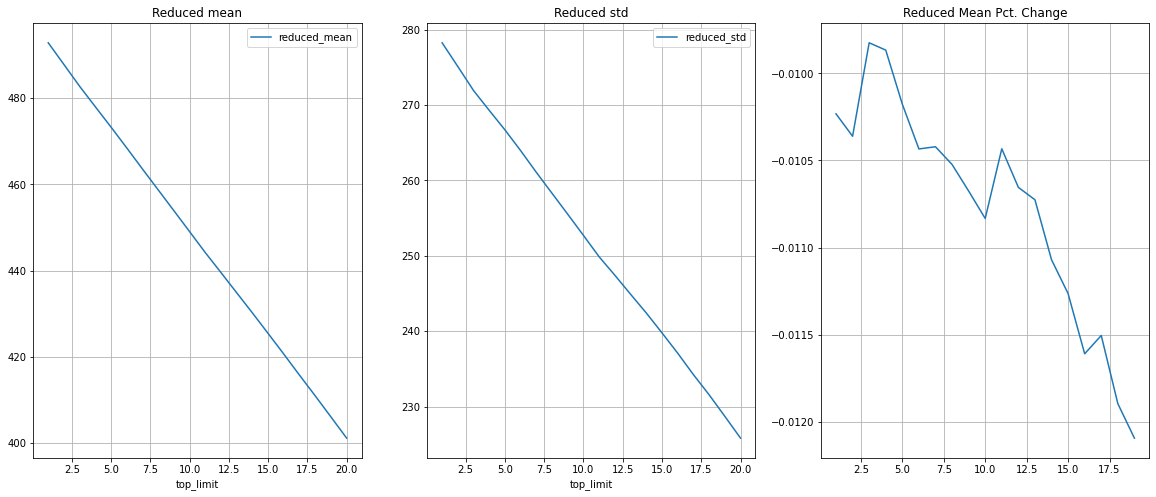

In [79]:
plot(2, 100, 20)

#### Perform the same experiment on NSE Symbols for a set of dates

In [58]:
def read_file(d1, d2):
    data_df = pd.read_csv('equities-and-indexes/nifty_price_data.csv', header=[0,1], skipinitialspace=True, index_col=[0])
    adj_cl_df = data_df['Adj Close']
    data = adj_cl_df[adj_cl_df.index.isin([d1, d2])].transpose().pct_change(axis=1).dropna(axis=1)
    data.index.name = 'symbol'
    data.columns = ['rets']
    
    return data.reset_index()  

In [73]:
def plot_data(d1, d2, limit):
    df = read_file(d1, d2)
    top_limit = list(np.arange(0, limit+1))
    
    val_df = pd.DataFrame(columns=['top_limit', 'reduced_mean', 'reduced_std'])
    val_df['top_limit'] = top_limit
    val_df['reduced_mean'] = [ df.sort_values(['rets'], ascending=False).reset_index(drop=True).loc[val:len(df)-1, 'rets'].mean() for val in top_limit ]
    val_df['reduced_std'] = [ df.sort_values(['rets'], ascending=False).reset_index(drop=True).loc[val:len(df)-1, 'rets'].std() for val in top_limit ]
    
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    val_df.plot(y='reduced_mean', x='top_limit', grid=True, ax=axes[0], title='Reduced mean')
    val_df.plot(y='reduced_std', x='top_limit', grid=True, ax=axes[1], title='Reduced std')
    val_df['reduced_mean'].pct_change().plot(grid=True, ax=axes[2], title='Reduced Mean Pct. Change')
    plt.show()

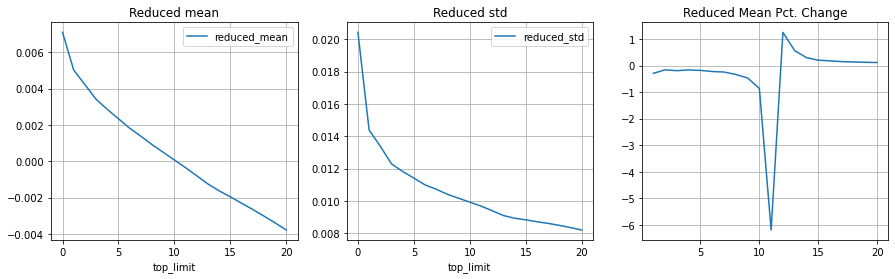

In [74]:
plot_data('2021-10-04', '2021-10-05', 20)

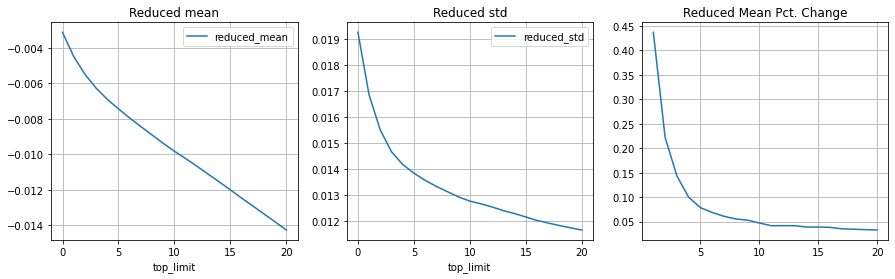

In [75]:
plot_data('2021-10-20', '2021-10-21', 20)

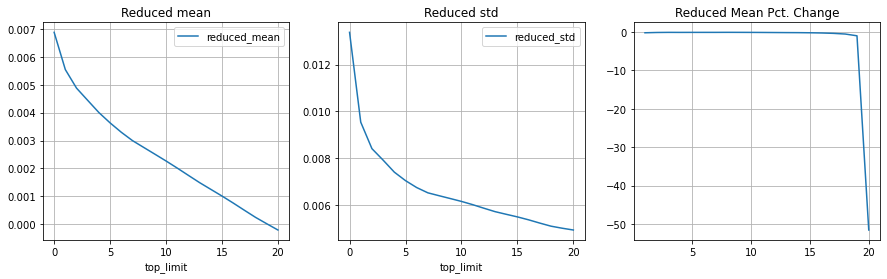

In [76]:
plot_data('2021-06-09', '2021-06-10', 20)

#### Develop dataset from start date to end date of nifty_price_data.csv file where each column is in the range (0, n) where n is the limit

In [63]:
def get_data():
    data_df = pd.read_csv('equities-and-indexes/nifty_price_data.csv', header=[0,1], skipinitialspace=True, index_col=[0])
    adj_cl_df = data_df['Adj Close']
    adj_cl_df.sort_index(ascending=True, inplace=True)
    rets_df = adj_cl_df.pct_change().round(6).dropna().sort_index(ascending=True)
    
    return rets_df

In [68]:
def get_returns(rets_df, d): 
    data = rets_df[rets_df.index == d].transpose()
    data.index.name = 'symbol'
    data.columns = ['rets']
    
    return data.reset_index()  

In [69]:
def develop_df(rets_df, limit):
    top_limit = list(np.arange(0, limit+1))
    val_df = pd.DataFrame(columns=top_limit)
    for dt in rets_df.index.tolist():
        df = get_returns(rets_df, dt)
        val_df.loc[dt] = [ df.sort_values(['rets'], ascending=False).reset_index(drop=True).loc[val:len(df)-1, 'rets'].mean() for val in top_limit ]
       
    return val_df

In [70]:
rets_df = get_data()

In [71]:
final_df = develop_df(rets_df, 20)

In [72]:
final_df.head(20)

0         1         2         3         4         5   \
2020-01-02  0.008646  0.007793  0.007020  0.006229  0.005569  0.004979   
2020-01-03 -0.004838 -0.005389 -0.005919 -0.006469 -0.006944 -0.007361   
2020-01-06 -0.015784 -0.016445 -0.016958 -0.017408 -0.017829 -0.018236   
2020-01-07  0.004085  0.003297  0.002940  0.002635  0.002328  0.002028   
2020-01-08 -0.002720 -0.003406 -0.003943 -0.004491 -0.004982 -0.005327   
2020-01-09  0.014874  0.013965  0.013177  0.012630  0.012063  0.011584   
2020-01-10  0.004860  0.004164  0.003482  0.003061  0.002635  0.002370   
2020-01-13  0.007737  0.006916  0.006352  0.005797  0.005261  0.004799   
2020-01-14  0.005120  0.003105  0.002759  0.002416  0.002105  0.001833   
2020-01-15  0.000796  0.000263 -0.000210 -0.000538 -0.000833 -0.001138   
2020-01-16 -0.001542 -0.002475 -0.003220 -0.003662 -0.004078 -0.004472   
2020-01-17  0.000467 -0.000650 -0.001351 -0.001976 -0.002370 -0.002697   
2020-01-20 -0.007931 -0.008843 -0.009387 -0.009804 -0.010199 -0.010606   
2020-01-21 -0.006360 -0.006789 -0.007075 -0.007358 -0.007649 -0.007929   
2020-01-22 -0.005233 -0.005902 -0.006397 -0.006906 -0.007415 -0.007831   
2020-01-23  0.007207  0.006510  0.006026  0.005528  0.005141  0.004749   
2020-01-24  0.005379  0.004964  0.004535  0.004124  0.003711  0.003345   
2020-01-27 -0.007115 -0.008319 -0.008910 -0.009495 -0.009967 -0.010363   
2020-01-28 -0.005923 -0.006620 -0.007069 -0.007534 -0.007952 -0.008352   
2020-01-29  0.007763  0.006537  0.005654  0.005153  0.004659  0.004156   

                  6         7         8         9   ...        11        12  \
2020-01-02  0.004384  0.003786  0.003226  0.002647  ...  0.001818  0.001482   
2020-01-03 -0.007785 -0.008120 -0.008454 -0.008779  ... -0.009401 -0.009680   
2020-01-06 -0.018649 -0.019042 -0.019430 -0.019837  ... -0.020624 -0.021021   
2020-01-07  0.001724  0.001423  0.001127  0.000837  ...  0.000260 -0.000025   
2020-01-08 -0.005670 -0.005965 -0.006274 -0.006570  ... -0.007163 -0.007470   
2020-01-09  0.011108  0.010631  0.010232  0.009815  ...  0.009020  0.008648   
2020-01-10  0.002101  0.001850  0.001599  0.001350  ...  0.000876  0.000642   
2020-01-13  0.004433  0.004054  0.003683  0.003321  ...  0.002746  0.002493   
2020-01-14  0.001548  0.001253  0.000954  0.000645  ... -0.000002 -0.000320   
2020-01-15 -0.001452 -0.001730 -0.001987 -0.002244  ... -0.002748 -0.003007   
2020-01-16 -0.004868 -0.005250 -0.005645 -0.006008  ... -0.006717 -0.007063   
2020-01-17 -0.002978 -0.003264 -0.003533 -0.003807  ... -0.004329 -0.004584   
2020-01-20 -0.011017 -0.011440 -0.011853 -0.012271  ... -0.013094 -0.013471   
2020-01-21 -0.008212 -0.008507 -0.008794 -0.009089  ... -0.009604 -0.009865   
2020-01-22 -0.008239 -0.008654 -0.009079 -0.009491  ... -0.010186 -0.010508   
2020-01-23  0.004346  0.003929  0.003515  0.003109  ...  0.002341  0.002006   
2020-01-24  0.002968  0.002579  0.002171  0.001785  ...  0.001019  0.000620   
2020-01-27 -0.010766 -0.011165 -0.011557 -0.011939  ... -0.012742 -0.013152   
2020-01-28 -0.008729 -0.009111 -0.009489 -0.009883  ... -0.010649 -0.011030   
2020-01-29  0.003669  0.003208  0.002804  0.002505  ...  0.001929  0.001652   

                  13        14        15        16        17        18  \
2020-01-02  0.001131  0.000785  0.000427  0.000079 -0.000252 -0.000520   
2020-01-03 -0.009974 -0.010248 -0.010535 -0.010810 -0.011086 -0.011358   
2020-01-06 -0.021427 -0.021854 -0.022300 -0.022756 -0.023155 -0.023572   
2020-01-07 -0.000298 -0.000556 -0.000820 -0.001056 -0.001270 -0.001493   
2020-01-08 -0.007791 -0.008126 -0.008441 -0.008765 -0.009108 -0.009461   
2020-01-09  0.008260  0.007879  0.007483  0.007077  0.006693  0.006307   
2020-01-10  0.000407  0.000171 -0.000067 -0.000304 -0.000544 -0.000787   
2020-01-13  0.002233  0.001960  0.001675  0.001412  0.001138  0.000897   
2020-01-14 -0.000613 -0.000917 -0.001213 -0.001491 -0.001776 -0.002067   
2020-01-15 -0.003278 -0.003559 -0.003849 -0.004150 -0.004449 -0